# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import nbconvert
##!pip install nbconvert

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:
All the columns have 1898 rows.

There are a total of 5 numerical columns and 4 object type columns.

There are 4 integer columns. Order_id, Customer_id, food_preparation_time and delivery_time.

The Cost_of_the_order column is float data type.

Other columns Restaurant_name, Cuisine_type, Day_of_the_week and Rating are String data type.
The Rating column is object type because contains the value 'Not Given'.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
There are no missing values in any columns.

The Rating Column has 736 'Not given' values but that is not considered as missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

The minimum and the maximum time taken for the food to be prepared is 20mins and 35mins respectively. The average time taken is approximately 27mins.

The minimum and the maximum time taken for the order to be delivered is 15mins and 33mins respectively.

The Cost per order ranges from 4 to 36 dollars.

About 30% of the total order is American Cuisine.

Most orders are from the restaurant Shake Shack.

71% of the orders are during the weekend.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
print("There are a total of", df[df['rating'] == 'Not given'].shape[0], "orders that are not rated")
#df['rating'].isna().sum()

There are a total of 736 orders that are not rated


#### Observations:
We can say from the above observation that a total of 736 out of 1898 orders have not been rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()

1200

In [ ]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

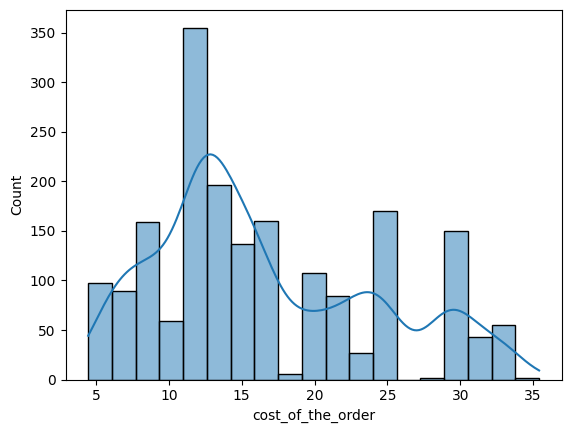

In [ ]:
sns.histplot(data = df, x= 'cost_of_the_order' , kde= True);

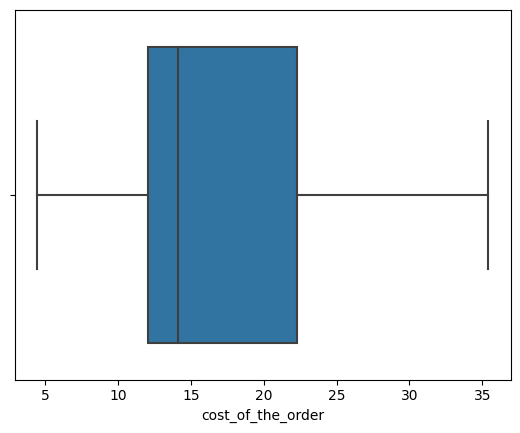

In [ ]:
sns.boxplot(data = df, x= 'cost_of_the_order');

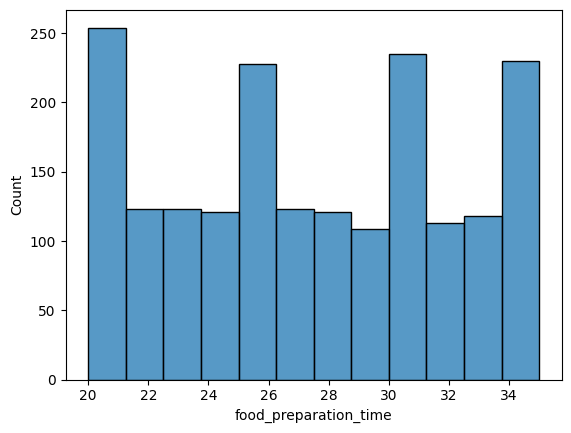

In [ ]:
sns.histplot(data = df, x= 'food_preparation_time');

In [ ]:
df['food_preparation_time'].value_counts()

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64

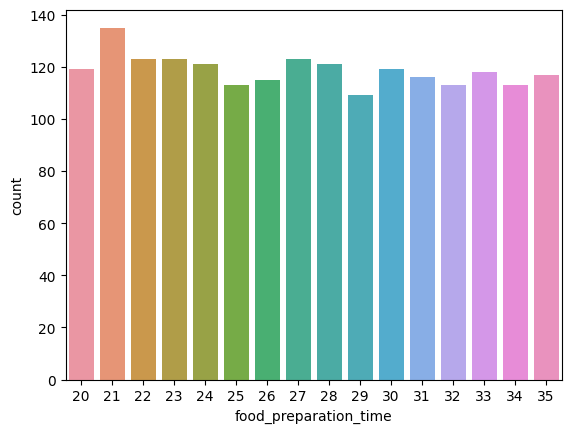

In [ ]:
sns.countplot(data = df, x = 'food_preparation_time');

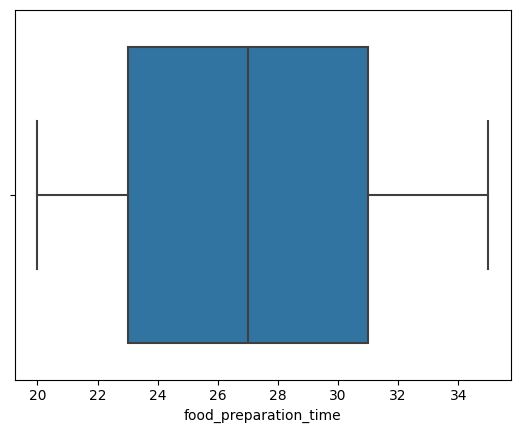

In [ ]:
sns.boxplot(data = df, x= 'food_preparation_time');

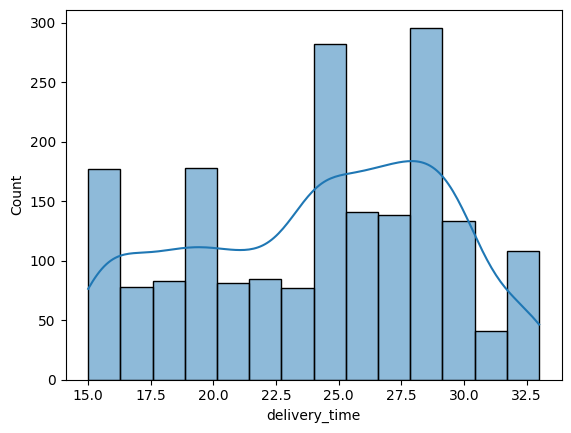

In [ ]:
sns.histplot(data = df, x = 'delivery_time',kde = True);

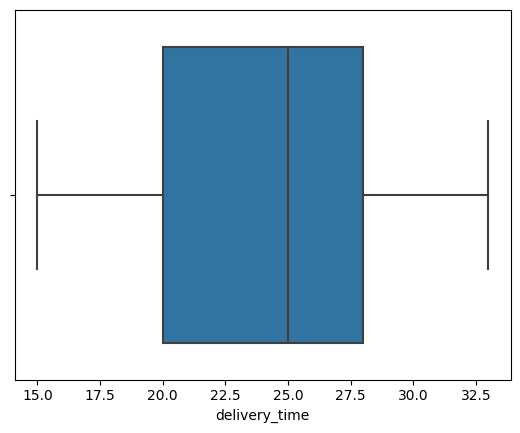

In [ ]:
sns.boxplot(data = df, x = 'delivery_time');

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
df['cuisine_type'].nunique()

14

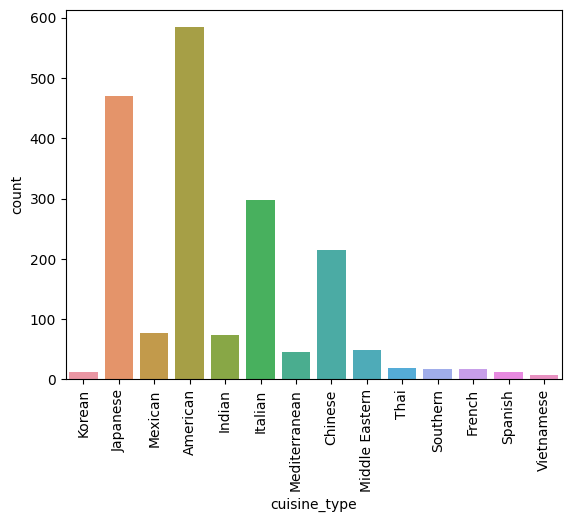

In [ ]:
sns.countplot(data = df, x= 'cuisine_type');
plt.xticks(rotation = 90);

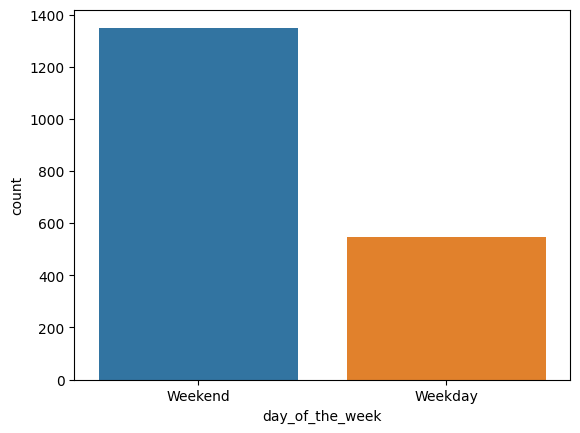

In [ ]:
sns.countplot(data = df, x= 'day_of_the_week');

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

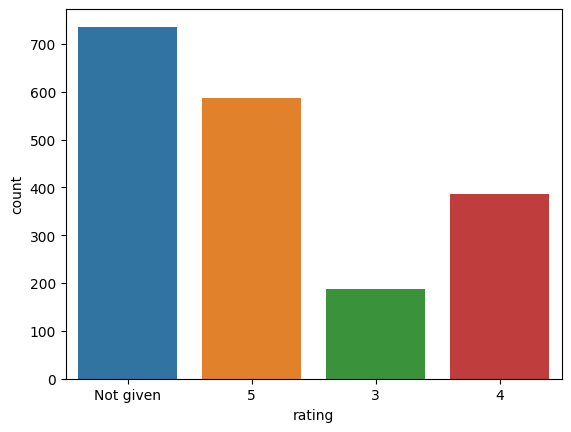

In [ ]:
sns.countplot(data = df, x = 'rating');

#### Observations:
The order_id is a unique column. There are no duplicates in the order_id column.

There are a total of 1200 customers. The highest number of orders made by a single customer is 13.

The cost of each order ranges from 4 dollars to 35 dollars. 50% of the orders cost between 12 dollars to 22.5 dollars.

50% of the orders took 27 minutes or less for preparing the food. 7% of the orders took only 21 minutes for preparing the food.

The average delivery time taken for the order to be delivered is 24minutes. 75% of the orders have been delivered within 28minutes.

There are no outliers in food_preparation_time and delivery_time.

There are a total of 178 different restaurants registered to the app. The top three restaurants that have the most number of orders are 'Shake Shack', 'The Meatball Shop' and 'Blue Ribbon Sushi'. These 3 restaurants together constitutes about 25% of the orders.

There are 14 different types of cuisine. The most ordered cuisine is American followed by Japanese, Italian and Chinese. The least ordered cuisine type is Vietnamese.

Only 29% of the orders are during the weekdays.

About 39% of the orders are not rated and 31% of the oders are rated 5 stars.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are:

1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df['cuisine_type'][df['day_of_the_week'] == 'Weekend'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine type during the weekend is American followed by Japanese and Italian.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
(df.loc[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]) *100

29.24130663856691

#### Observations:

29% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean().round(2)

24.16

#### Observations:
The average delivery time of an order is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The IDs of the top 3 customers who have the most number of orders are


1.   52832 has placed 13 orders.
2.   47440 has placed 10 orders.
3.   83287 has placed 9 orders.





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


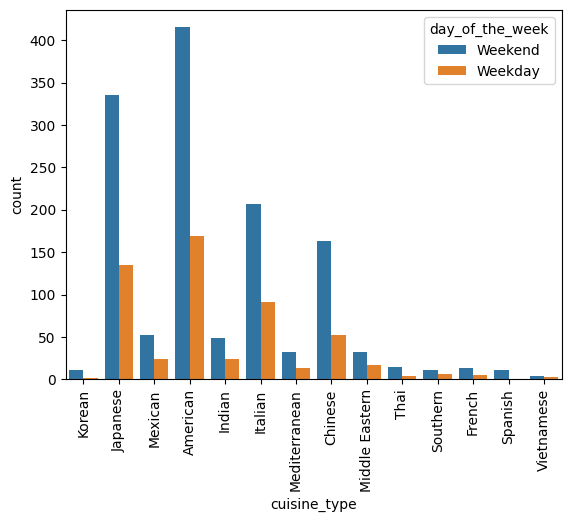

In [ ]:
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week');
plt.xticks(rotation = 90);

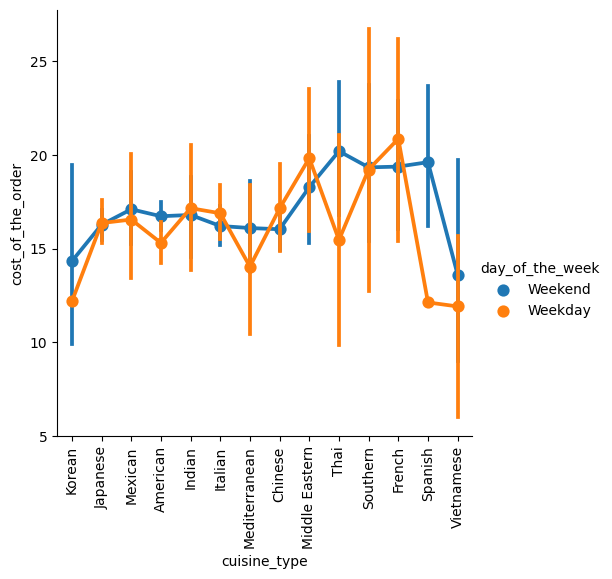

In [ ]:
sns.catplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order' , hue = 'day_of_the_week', kind = 'point');
plt.xticks(rotation = 90);

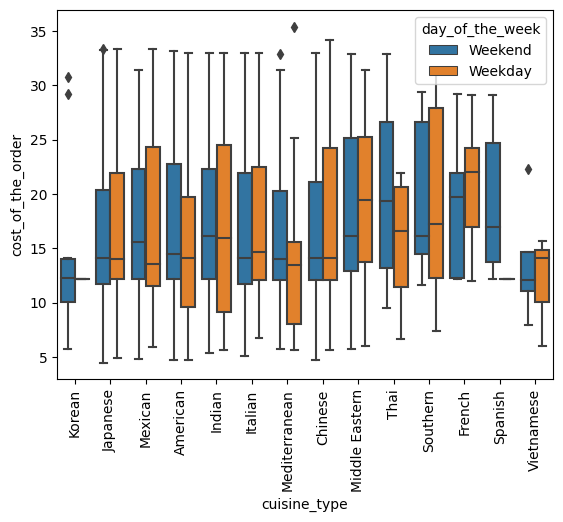

In [ ]:
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order' , hue = 'day_of_the_week');
plt.xticks(rotation = 90);

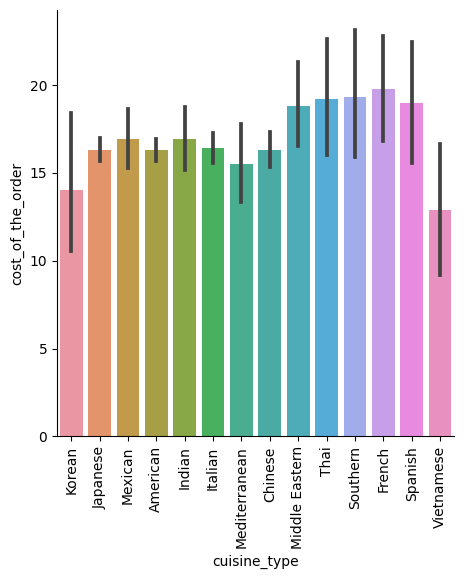

In [ ]:
sns.catplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', kind = 'bar');
plt.xticks(rotation = 90);

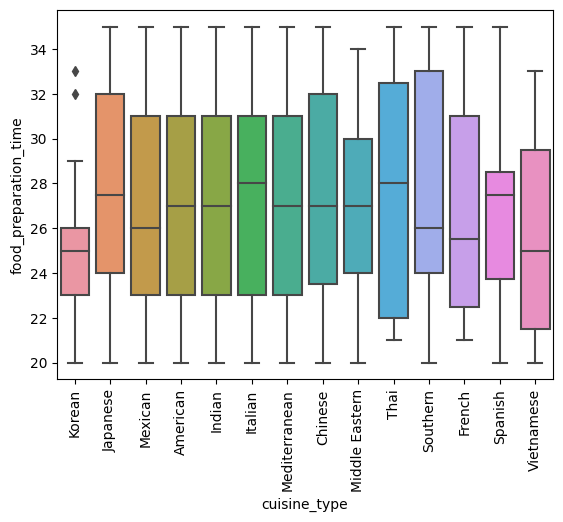

In [ ]:
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time');
plt.xticks(rotation = 90);

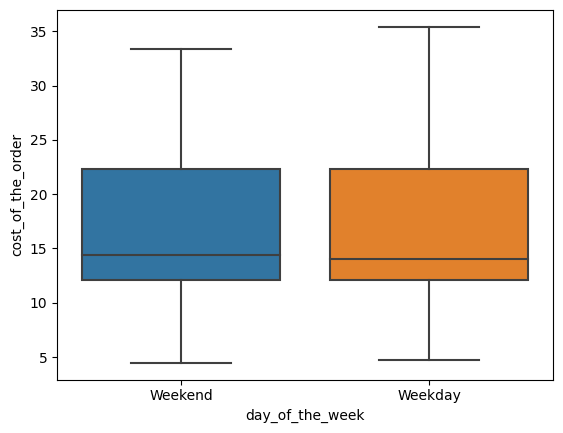

In [ ]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order');

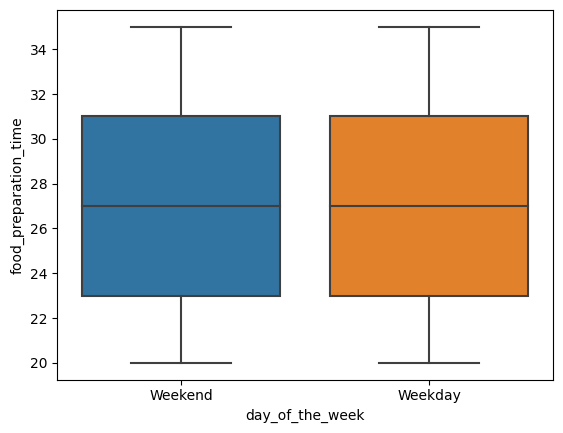

In [ ]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time');

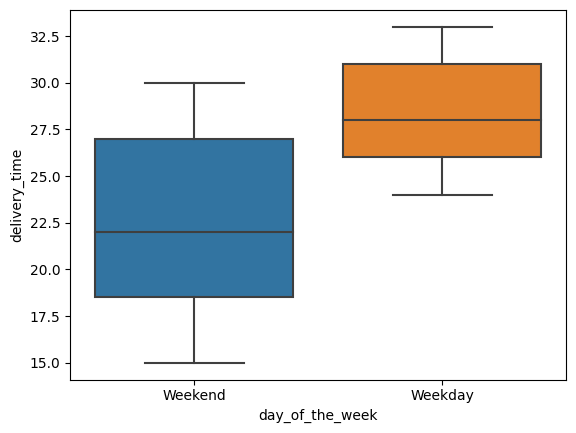

In [ ]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time');

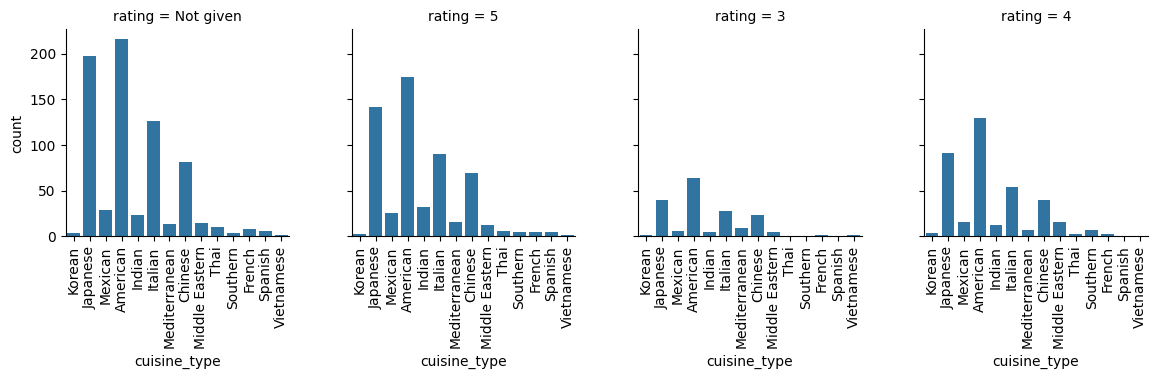

In [ ]:
g = sns.FacetGrid(data = df, col = 'rating').map(sns.countplot, "cuisine_type", order=df.cuisine_type.unique());
g.set_xticklabels(rotation=90);

In [ ]:
df.groupby(['cuisine_type'])['restaurant_name'].nunique().reset_index().sort_values( by = 'restaurant_name' , ascending = False)

,cuisine_type,restaurant_name
0,American,41
4,Italian,31
5,Japanese,29
1,Chinese,16
3,Indian,14
8,Mexican,11
12,Thai,9
9,Middle Eastern,7
6,Korean,5
7,Mediterranean,5


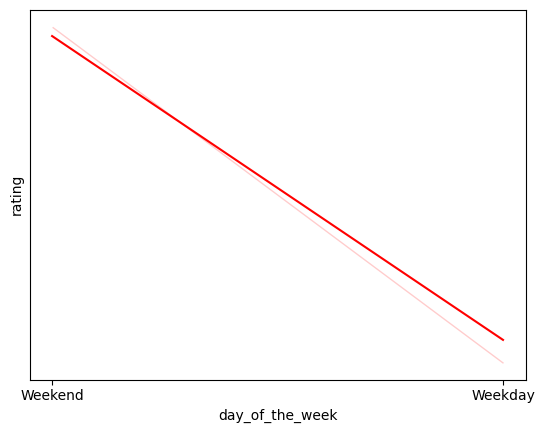

In [ ]:
sns.lineplot(data=df, x="day_of_the_week", y="rating", errorbar = ('ci',False), color="red");

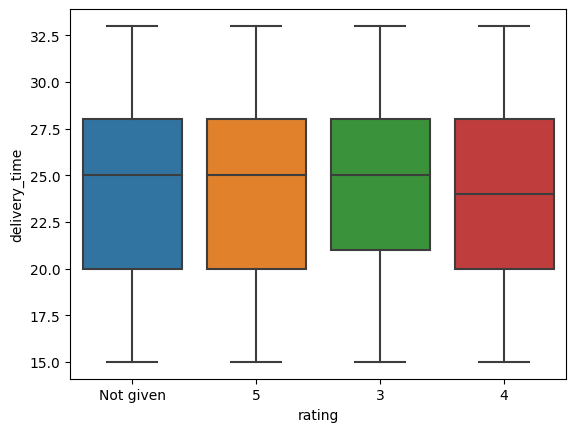

In [ ]:
sns.boxplot(data = df, x = 'rating', y = 'delivery_time');

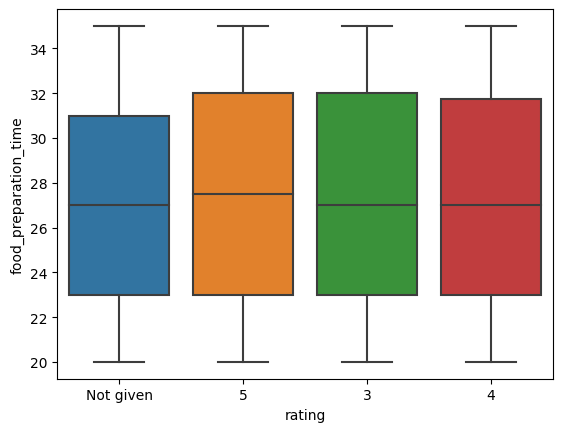

In [ ]:
sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time');

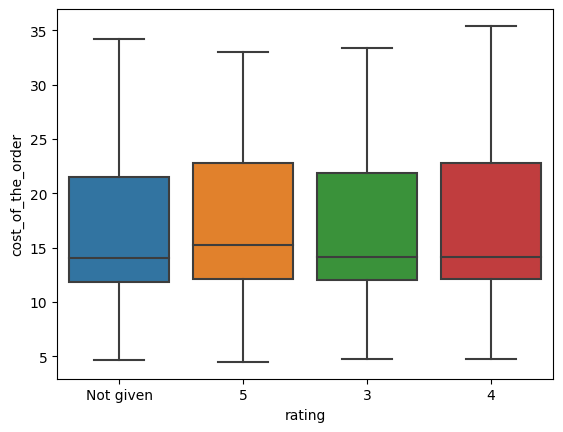

In [ ]:
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order');

#### Observations:

The most ordered cuisine during both weekend and weekday is American.

We can observe that 50% of the Mexican food costs more than 14 dollars during Weekday.
50% of French orders costs between 12.5 to 20 doallars during the weekend.

On an average the cost of any cuisine is more than 12 dollars.

It can be seen that 50% of orders of any cuisine can be prepared within 28mins.

25% of the Southern cuisine style takes about 26-33 minutes for the food to be prepared.

50% of Thai and Italian food takes about 28minutes for preparing.

Almost all of the Korean cuisine orders are prepared within 29mins except few outliers.

The cost of the order is similar during both weekdays and weekends. The time taken for preparing the food is also similar during the weekend and weekdays.

Time taken for delivering the order is less during the weekend. 50% of the orders are delivered within 22 minutes during the weekend. Minimum time taken for food delivery duing the weekdays is 24 minutes.

There are a total of 41 reestaurants under American cuisine category.

American cuisine has got the most 5 star rating followed by Japanese cuisine.

As we can see the ratings during the weekend is more because the number od orders is more.

The rating does not affect much with the time taken for preparing the food or the time taken for delivering the food or the cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Write the code here
df_rating = pd.DataFrame()
df_rating = df[df['rating'].isin(['5', '3', '4'])].copy()
df_rating['rating'] = df_rating['rating'].astype(int)
df_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [ ]:
df_restaurant = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_top_restaurant = df_restaurant[df_restaurant['rating']>50]

In [ ]:
df_top_restaurant

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
df_avg_rating = df_rating[df_rating['restaurant_name'].isin(['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken'])]

In [ ]:
df_avg_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25


In [ ]:
df_avg_rating.groupby(['restaurant_name'])['rating'].mean().reset_index().round(2)

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.33
1,Blue Ribbon Sushi,4.22
2,Shake Shack,4.28
3,The Meatball Shop,4.51


#### Observations:

The restaurants eligible for promotional offer are:


1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   Shake Shack
4.   Blue Ribbon Sushi



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df_cost_20 = df.loc[df['cost_of_the_order']> 20].copy()
df_cost_20['cost_of_the_order']  = df_cost_20['cost_of_the_order'] * 0.25
df_cost_20['cost_of_the_order'].sum()

3688.7275

In [ ]:
df_cost_5 = df.loc[(df['cost_of_the_order']> 5) & (df['cost_of_the_order']<= 20)].copy()
df_cost_5['cost_of_the_order']  = df_cost_5['cost_of_the_order'] * 0.15
df_cost_5['cost_of_the_order'].sum()

2477.5755

In [ ]:
df_rev = df_cost_20['cost_of_the_order'].sum() + df_cost_5['cost_of_the_order'].sum()
df_rev

6166.303

#### Observations:

The total revenue of the company is 6166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.loc[df['total_time']>60].shape[0]/df.shape[0] * 100

10.537407797681771

#### Observations:

10.5% of the orders takes more than 60 minutes for the order to be delivered to the customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean().round(2).reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.34
1,Weekend,22.47


#### Observations:

The mean delivery time taken during weekday is about 28 minutes and during the weekend is about 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   178 restaurants have been registered to the app.
*   There are a total of 14 cuisine types and American cuisine is the most ordered followed by Japanese cuisine.
*   Most of the orders are during the weekend.
*   About 90% of the orders are delivered within 60 minutes once the order has been placed. This includes the time required for preparing the food and the time it took for the order to get delivered to the customer.
*   About 40% of the customers have not rated the app but out of the 60% that have rated around 31% have given 5 stars.
*   The time taken for preparing the food does not affect which day of the week it is ordered.
*   The delivery is done faster during the weekends than during the weekdays.
*   Cost of the order ranges from 7 to 35 dollars. The average cost of one order is 16 dollars.
*   The cost of the order does not change much during the weekdays or during the weekends.

### Recommendations:
*   The company should focus more on American and Japanese cuisine restaurants as these are the top two most ordered cuisine. Both the top ordered cuisine has got the highest 5 star rating count.
*   Company can drop restaurants which serve Vietnamese, Spanish and Korean cuisine as the total number of orders is less.
*   The cost of French cuisine is compartively higher and the number of orders are also less. The company should probably not focus on French restaurants.
*   Since Japanese cuisine has the second highest number of orders, the company can buy more restaurants as it only has 29 restaurants.
*   The company should try to deliver the orders in 20 to 24 minutes even during the weekdays which help to increase the number of orders during the weekdays.
*   Since most of the orders are not rated, the company can make customers vote for their favorite restaurant/cuisine and take actions accordingly.
*   Since the demand is high during the weekends, there should not be a delay in delivering the orders.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1381317 bytes to /content/drive/My Drive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.html


---